In [1]:
%matplotlib inline
from science import *

## Make up some data

In [2]:
data=randn(1000)+40

(array([   3.,   12.,   54.,  124.,  245.,  274.,  193.,   66.,   24.,    5.]),
 array([ 36.3250245 ,  37.02624324,  37.72746197,  38.4286807 ,
         39.12989944,  39.83111817,  40.53233691,  41.23355564,
         41.93477438,  42.63599311,  43.33721185]),
 <a list of 10 Patch objects>)

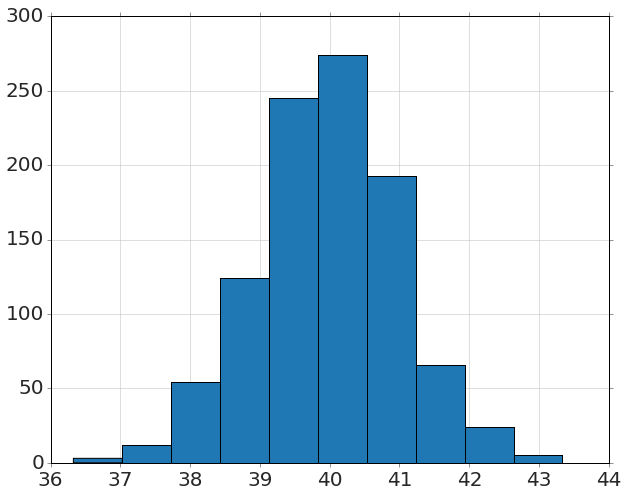

In [3]:
hist(data)

## Make it x-y data

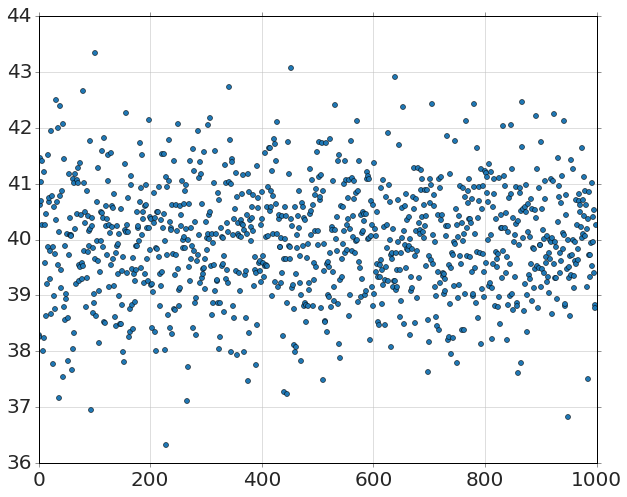

In [4]:
x=arange(len(data))
y=data
plot(x,y,'o')

# Constant Model
## Define Model

Sampling Prior...
Done.
0.25 s
Running MCMC...
Done.
1.48 s


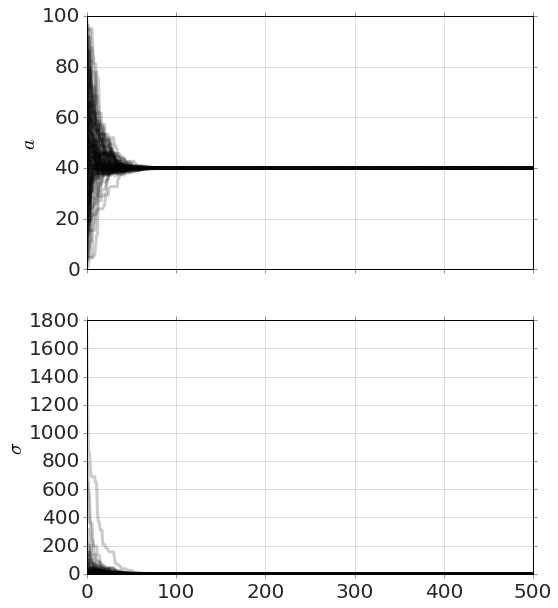

In [5]:
def constant(x,a):
    return a

model=MCMCModel(x,y,constant,
            a=Uniform(0,100),
            )
model.run_mcmc(500)
model.plot_chains()

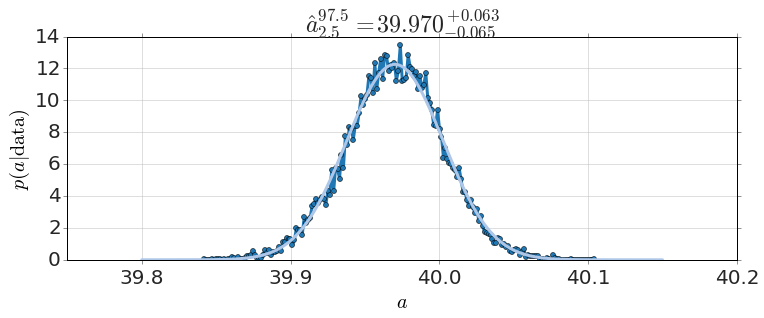

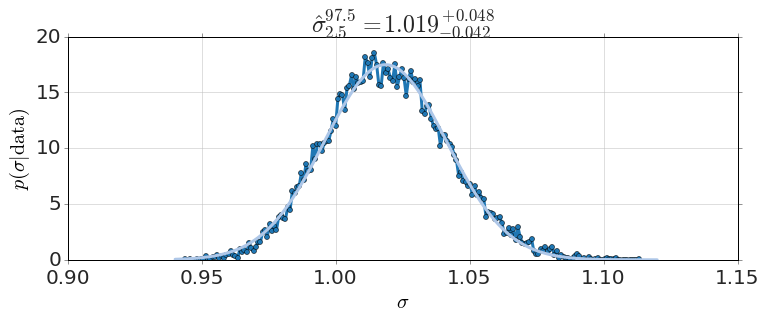

In [6]:
model.plot_distributions()

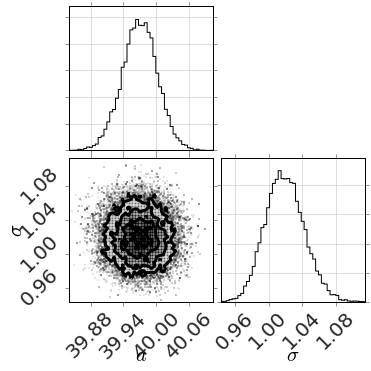

In [7]:
model.triangle_plot()

## Replot the data with the fit

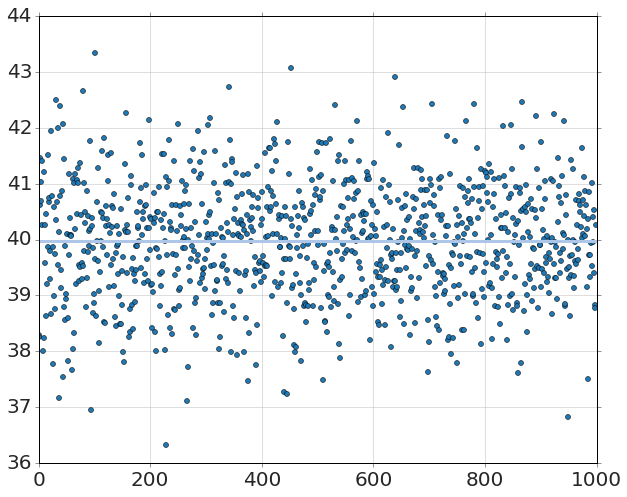

In [8]:
plot(x,y,'o')

xfit=linspace(0,1000,200)
yfit=model.predict(xfit)

plot(xfit,yfit,'-')

# Linear Model
## Define Model

Sampling Prior...
Done.
0.28 s
Running MCMC...
Done.
1.86 s


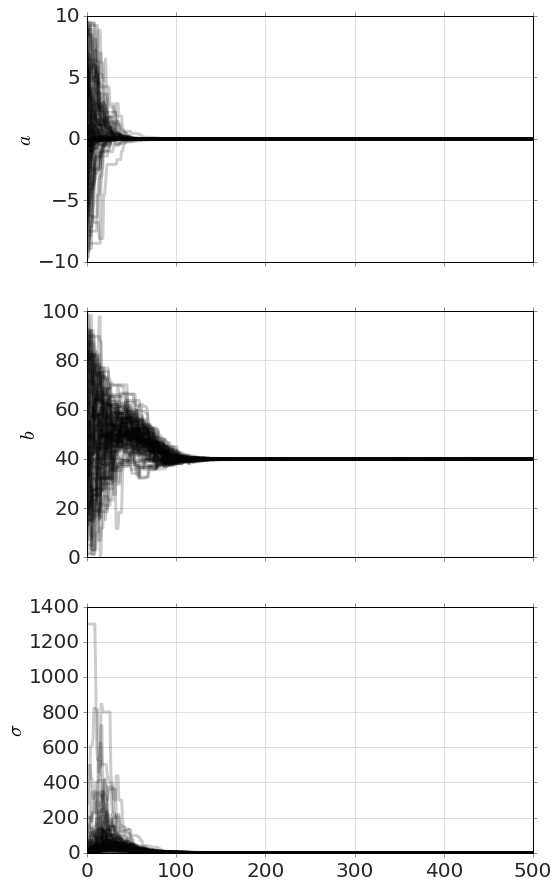

In [9]:
def linear(x,a,b):
    return a*x+b

model=MCMCModel(x,y,linear,
                a=Uniform(-10,10),
                b=Uniform(0,100),
                )

model.run_mcmc(500)
model.plot_chains()

chains look weird?  run for some more...

Running MCMC...
Done.
1.87 s


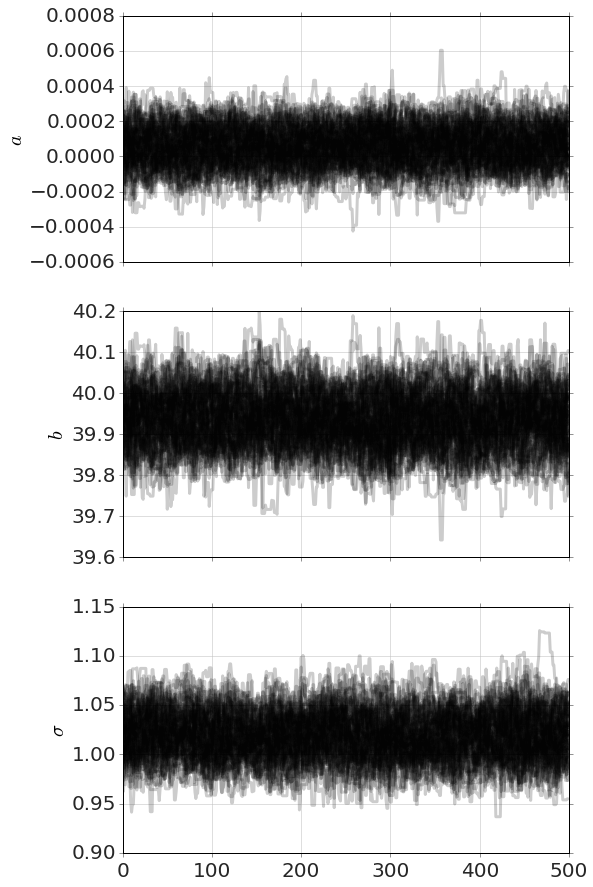

In [10]:
model.run_mcmc(500)
model.plot_chains()

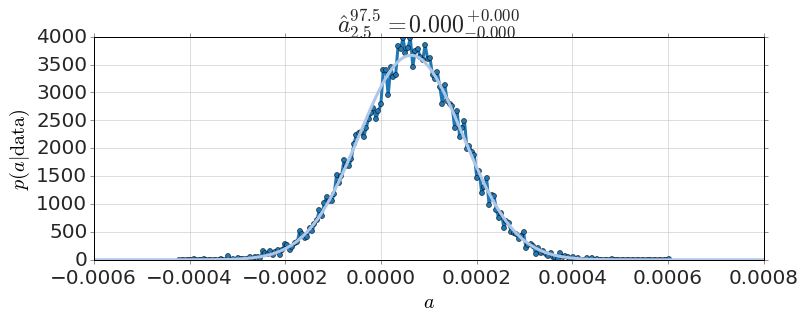

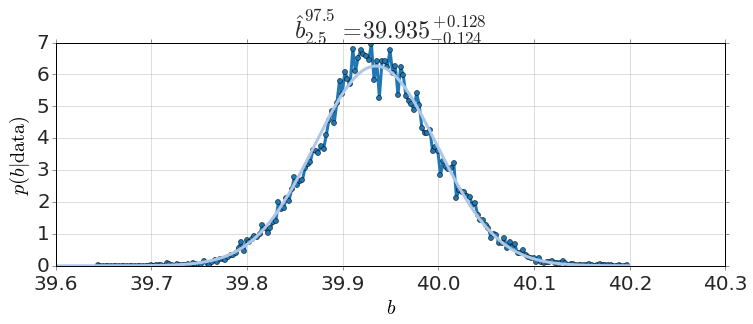

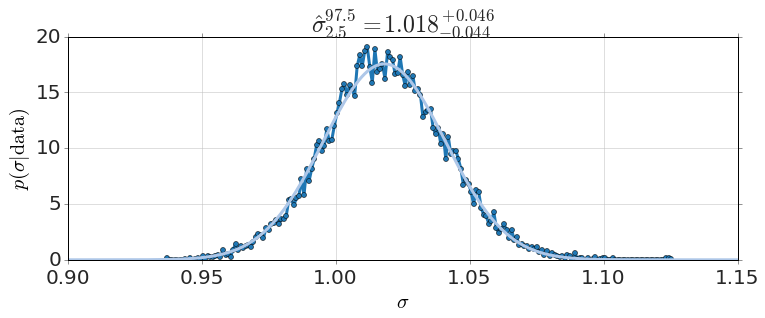

In [11]:
model.plot_distributions()

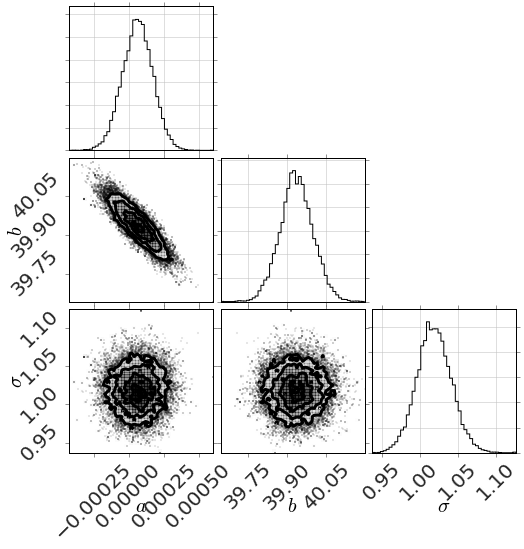

In [12]:
model.triangle_plot()

## Replot the data with the fit

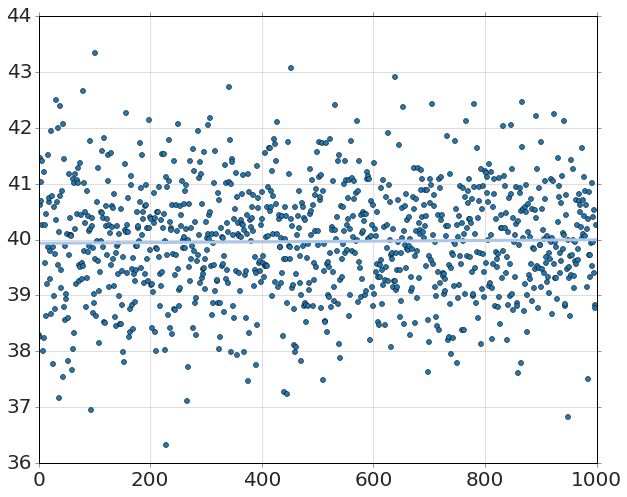

In [13]:
plot(x,y,'o')

xfit=linspace(0,1000,200)
yfit=model.predict(xfit)

plot(xfit,yfit,'-')

# Using some real data

In [14]:
xls = pandas.ExcelFile('temperatures.xls')

print xls.sheet_names

data=xls.parse('Sheet 1')
data

[u'Sheet 1']


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-43,-27,-26,-37,-32,-39,-24,-14,-30,-24,-20,-23,-28,-999,-999,-31,-26,-25,1880
1,1881,-20,-24,-1,-5,-6,-32,-14,-12,-26,-29,-38,-30,-20,-19,-22,-4,-19,-31,1881
2,1882,-13,-2,-10,-29,-25,-33,-27,-14,-25,-38,-37,-52,-26,-24,-15,-21,-25,-33,1882
3,1883,-46,-41,-18,-22,-27,-11,-10,-21,-31,-34,-33,-29,-27,-29,-47,-23,-14,-33,1883
4,1884,-27,-20,-35,-39,-37,-36,-28,-19,-31,-34,-36,-32,-31,-31,-25,-37,-28,-34,1884
5,1885,-61,-33,-24,-40,-33,-42,-30,-26,-23,-24,-19,-6,-30,-32,-42,-32,-33,-22,1885
6,1886,-37,-44,-28,-21,-19,-33,-8,-23,-20,-31,-34,-30,-27,-25,-29,-23,-21,-28,1886
7,1887,-64,-51,-35,-42,-29,-24,-8,-27,-25,-38,-32,-40,-35,-34,-48,-35,-20,-32,1887
8,1888,-48,-47,-46,-36,-29,-25,-19,-23,-19,-11,-5,-22,-28,-29,-45,-37,-22,-12,1888
9,1889,-23,8,-1,-3,-7,-13,-17,-25,-22,-30,-37,-34,-17,-16,-12,-4,-18,-30,1889


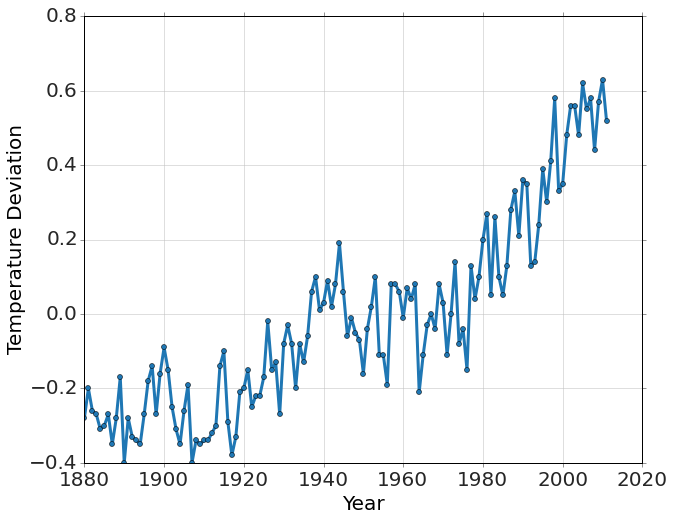

In [15]:
x=data['Year']
y=data['J-D']/100.0
plot(x,y,'-o')
xlabel('Year')
ylabel('Temperature Deviation')

Sampling Prior...
Done.
0.30 s
Running MCMC...
Done.
18.79 s


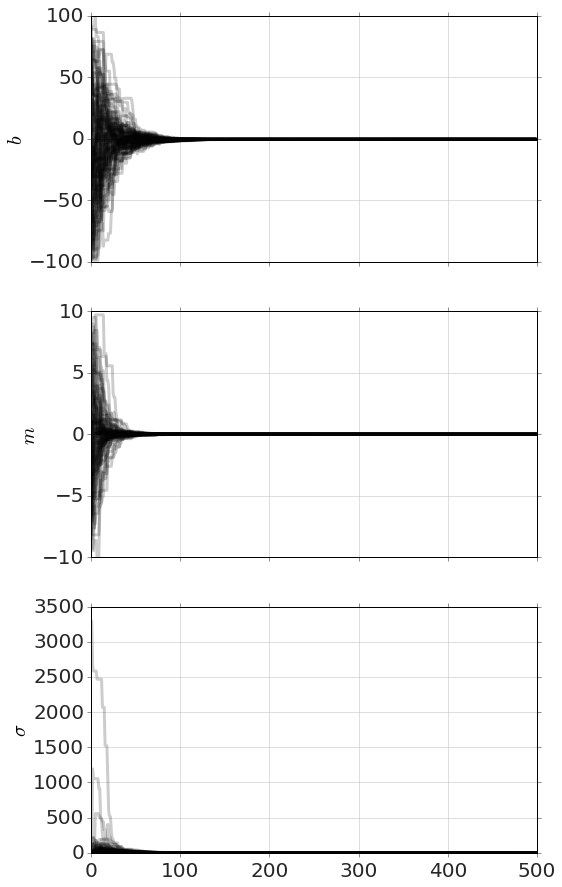

In [16]:
def linear(x,m,b):
    return m*x+b

x=data['Year']-1880
y=data['J-D']/100.0

model=MCMCModel(x,y,linear,
                m=Uniform(-10,10),
                b=Uniform(-100,100),
                )

model.run_mcmc(500)
model.plot_chains()

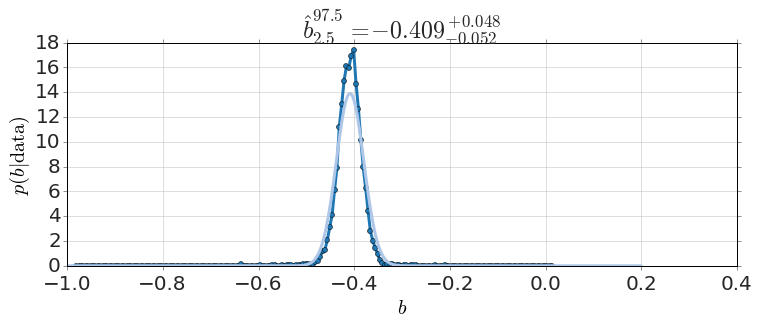

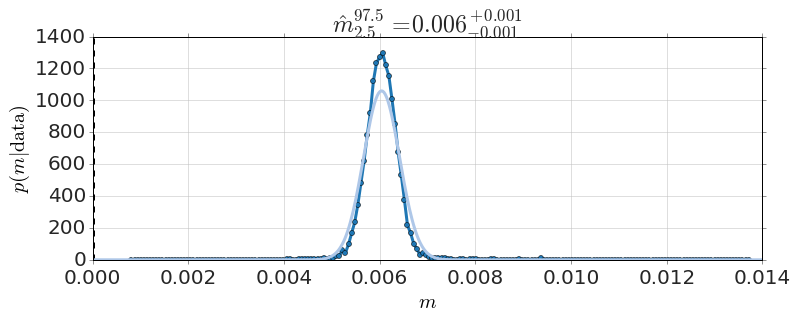

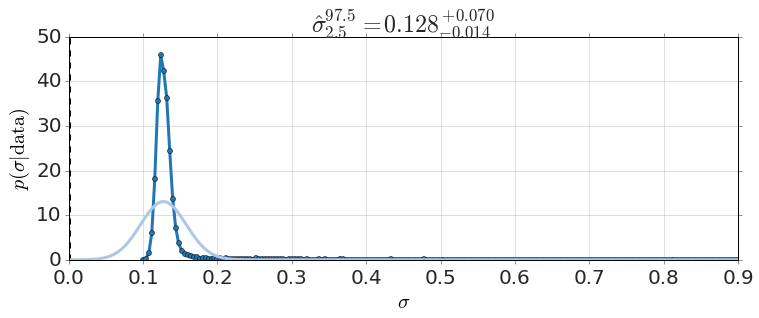

In [17]:
model.plot_distributions()

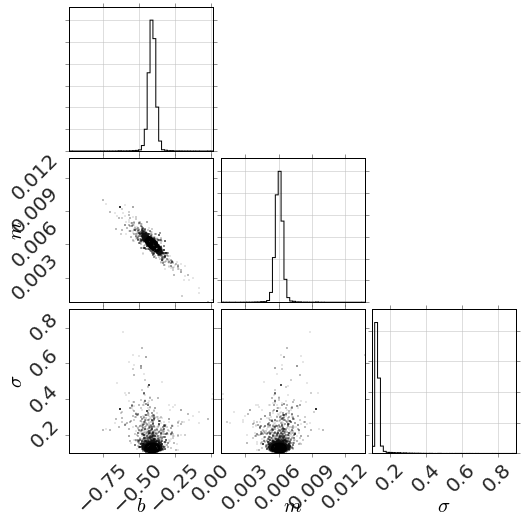

In [18]:
model.triangle_plot()

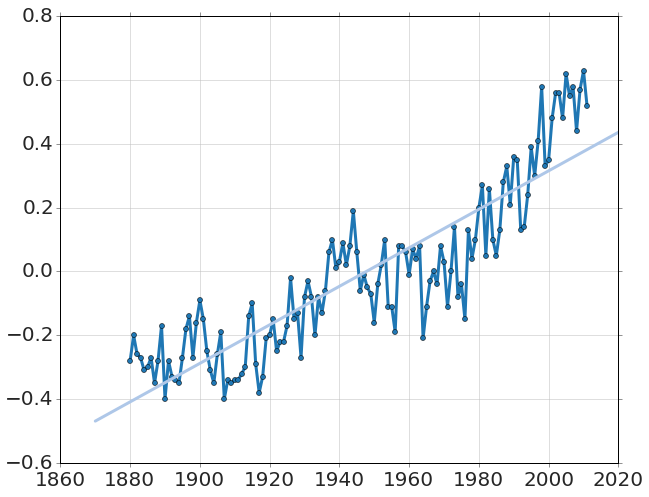

In [19]:
plot(x+1880,y,'-o')

xfit=linspace(1870,2020,200)
yfit=model.predict(xfit-1880)

plot(xfit,yfit,'-')

## Sampling

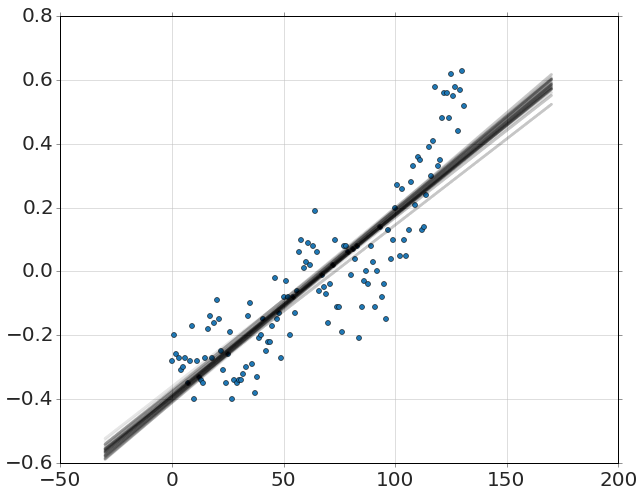

In [20]:
plot(x,y,'o')

xfit=linspace(1850,2050,200)
model.plot_predictions(xfit-1880,100)

## Quadratic?

In [21]:
def quadratic(x,a,b,c):
    return a*x**2 + b*x + c

 make the data a bit more numerically stable

Sampling Prior...
Done.
0.33 s
Running MCMC...
Done.
27.41 s


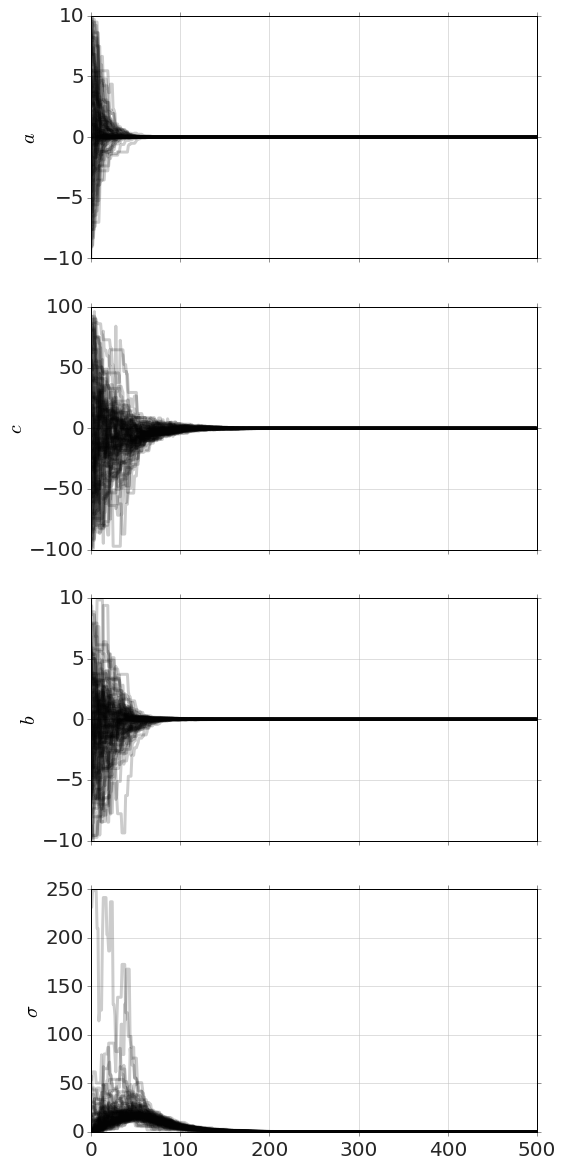

In [22]:
x=data['Year']
y=data['J-D']/100.0

# make a little more palatable
x=x-mean(x)
y=y-mean(y)

model=MCMCModel(x,y,quadratic,
                a=Uniform(-10,10),
                b=Uniform(-10,10),
                c=Uniform(-100,100),
                )

model.run_mcmc(500)
model.plot_chains()

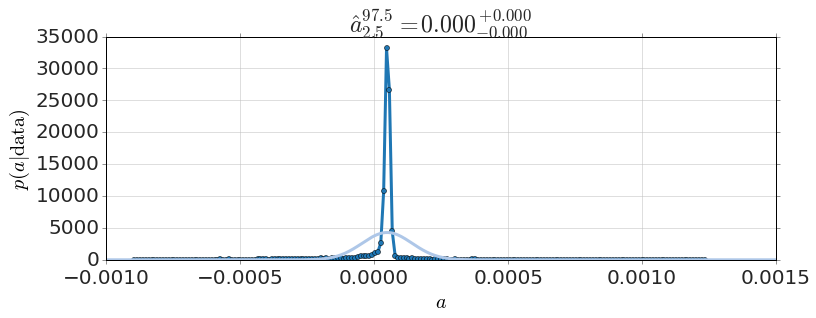

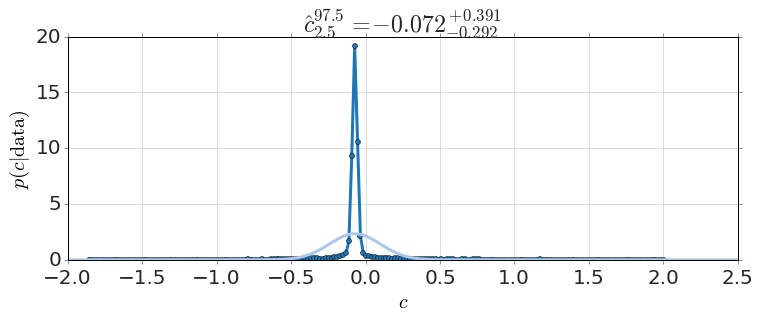

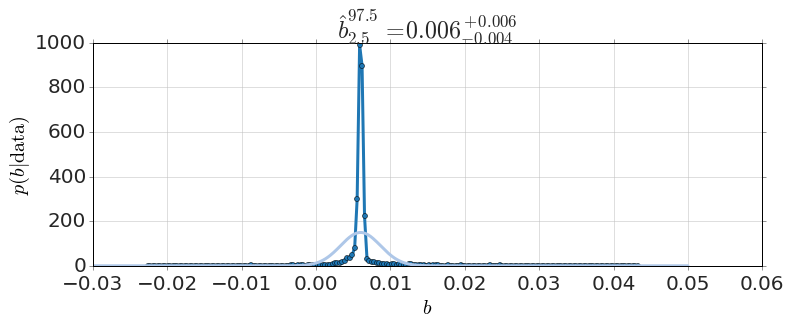

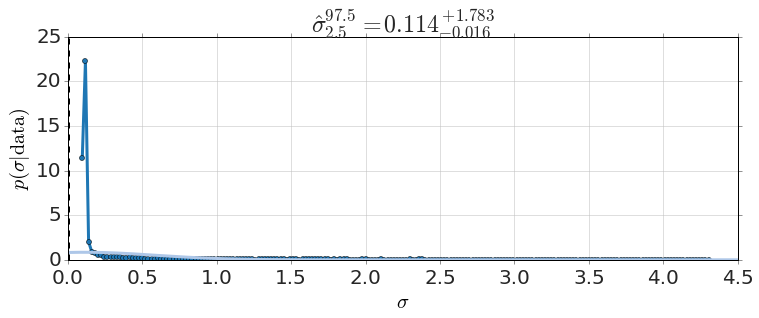

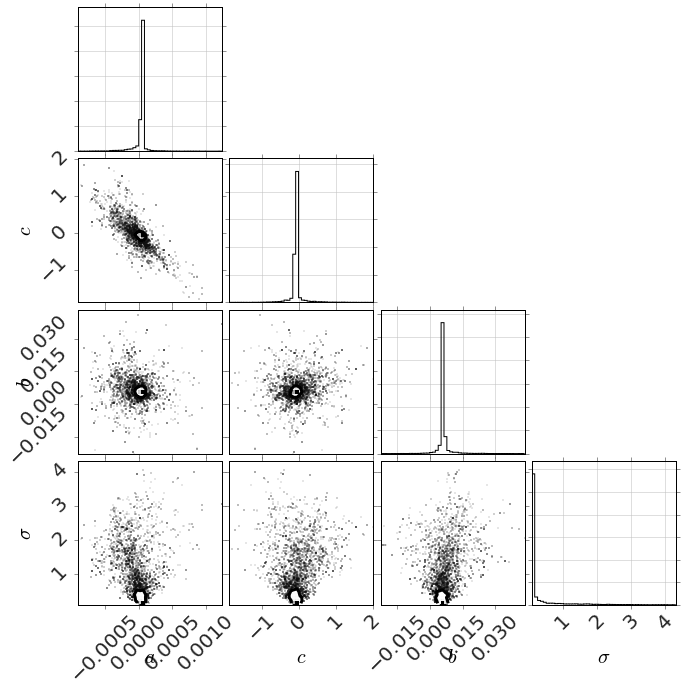

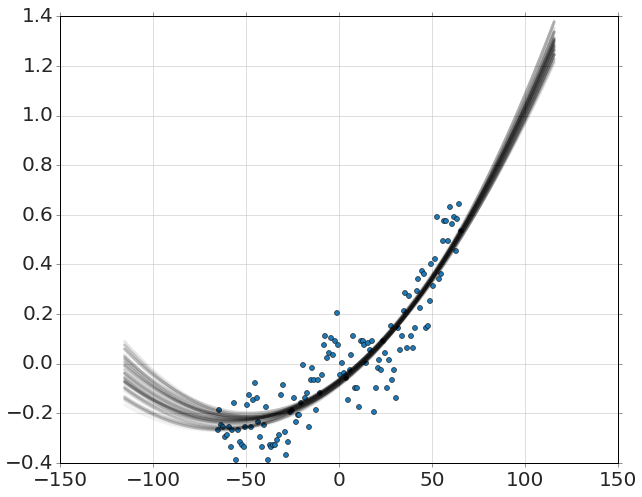

In [23]:
model.plot_distributions()
model.triangle_plot()

figure()
plot(x,y,'o')

xfit=linspace(min(x)-50,max(x)+50,200)
model.plot_predictions(xfit,100)    

what is I used the raw data?

Sampling Prior...
Done.
0.35 s
Running MCMC...
Done.
29.40 s


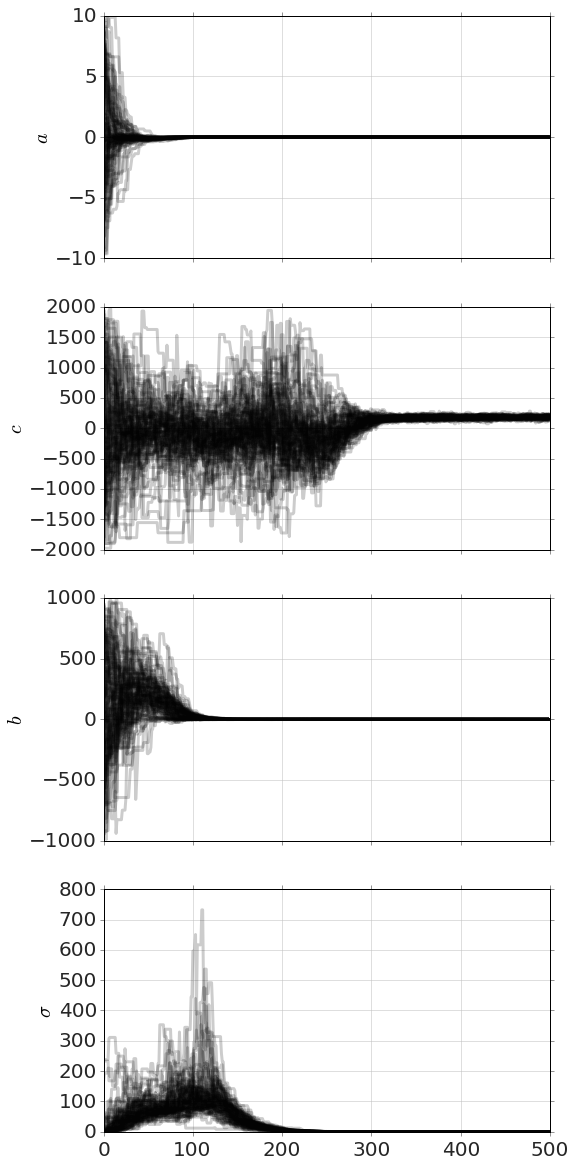

In [24]:
x=data['Year']
y=data['J-D']/100.0

model=MCMCModel(x,y,quadratic,
                a=Uniform(-10,10),
                b=Uniform(-1000,1000),
                c=Uniform(-2000,2000),
                )

model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
29.02 s


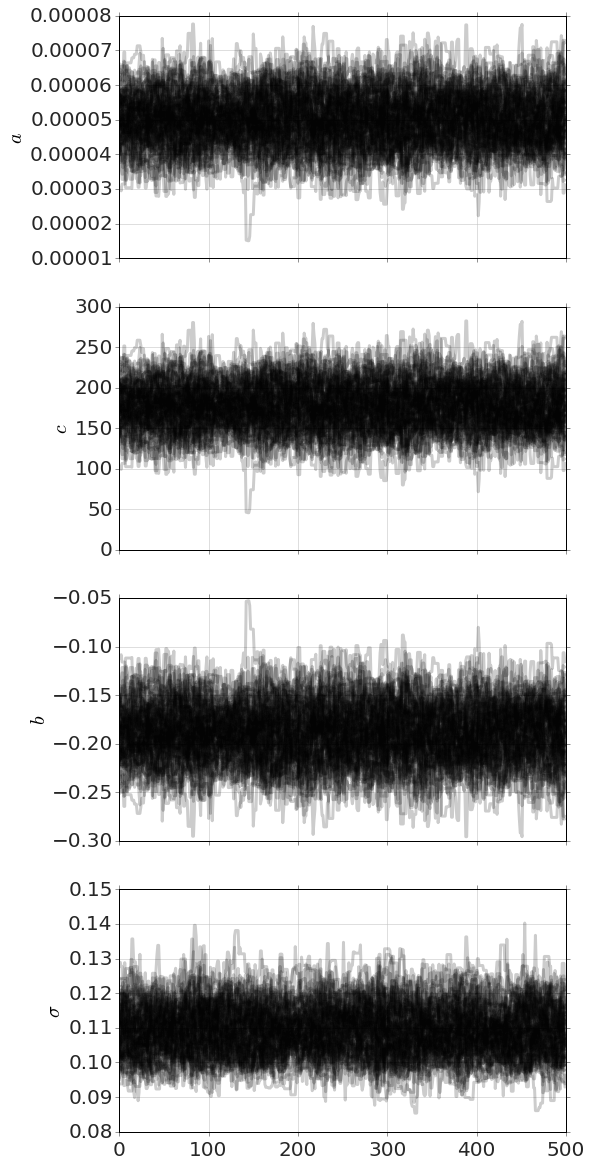

In [25]:
model.run_mcmc(500)
model.plot_chains()

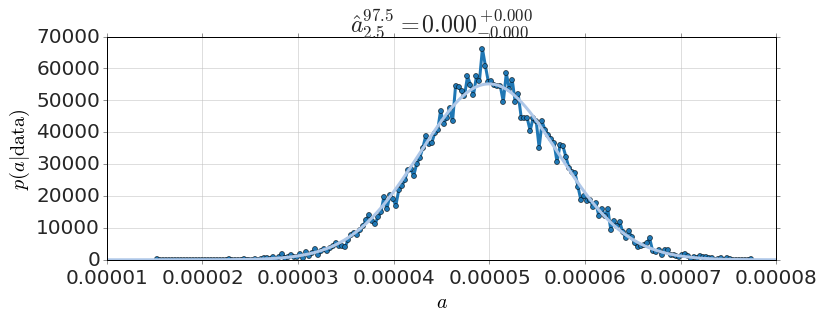

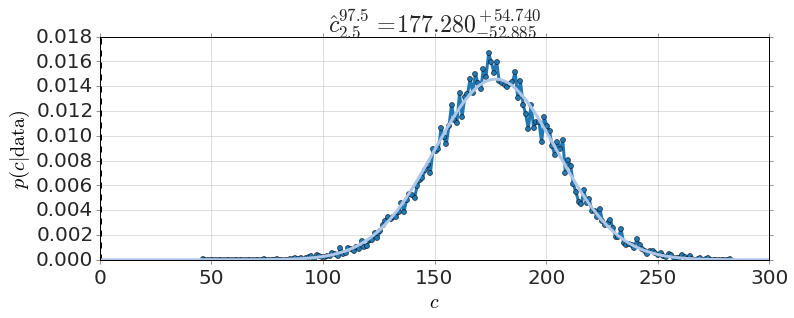

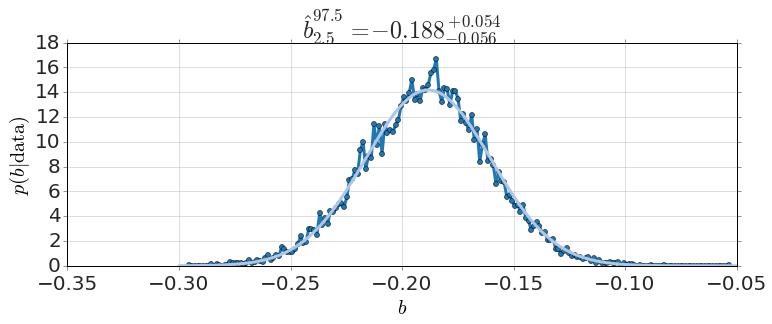

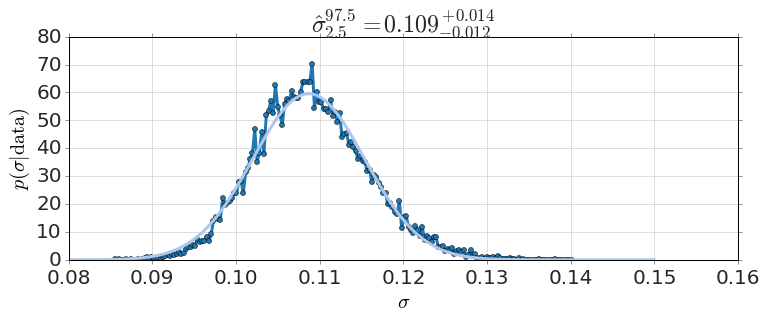

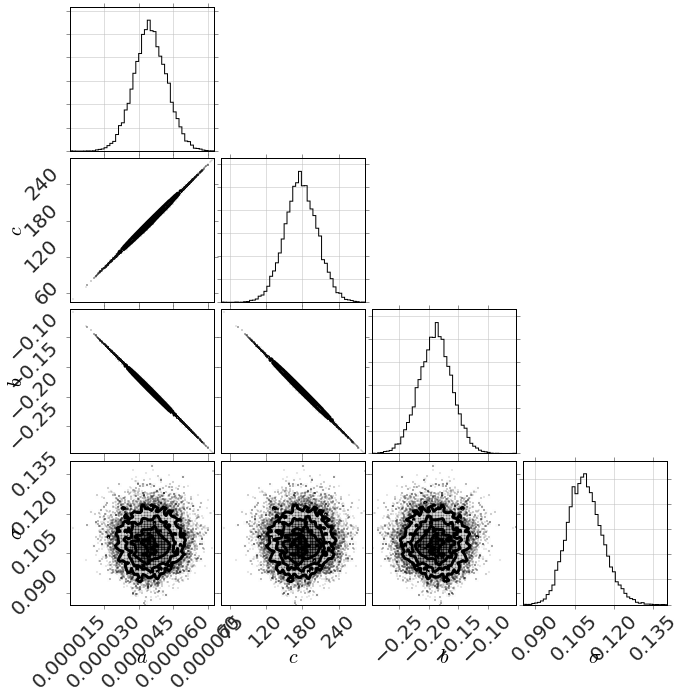

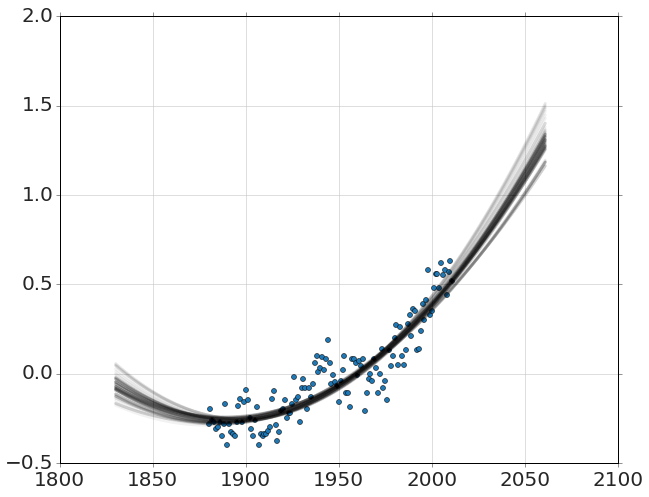

In [26]:
model.plot_distributions()
model.triangle_plot()

figure()
plot(x,y,'o')

xfit=linspace(min(x)-50,max(x)+50,200)
model.plot_predictions(xfit,100)    

## Logistic Model

http://mathinsight.org/bacteria_growth_logistic_model

definition of function from http://en.wikipedia.org/wiki/Logistic_function:

\begin{equation}
f(x)=\frac{L}{1+e^{-k(x-x_o)}}
\end{equation}

In [27]:
def logistic(x,L,k,xo):
    return L/(1.0+exp(-k*(x-xo)))

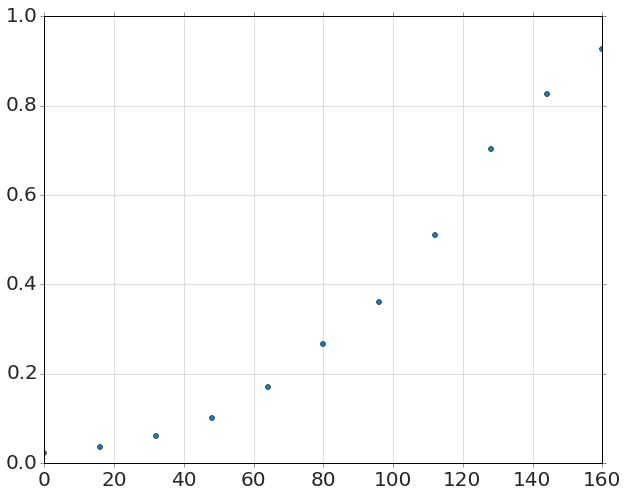

In [28]:
datastr="""0	0	0.022
16	1	0.036
32	2	0.060
48	3	0.101
64	4	0.169
80	5	0.266
96	6	0.360
112	7	0.510
128	8	0.704
144	9	0.827
160	10	0.928
"""

x,y=zip(*[(float(line.split()[0]),float(line.split()[2])) for line in datastr.split('\n') if line])
plot(x,y,'o')

Sampling Prior...
Done.
0.35 s
Running MCMC...
Done.
1.46 s


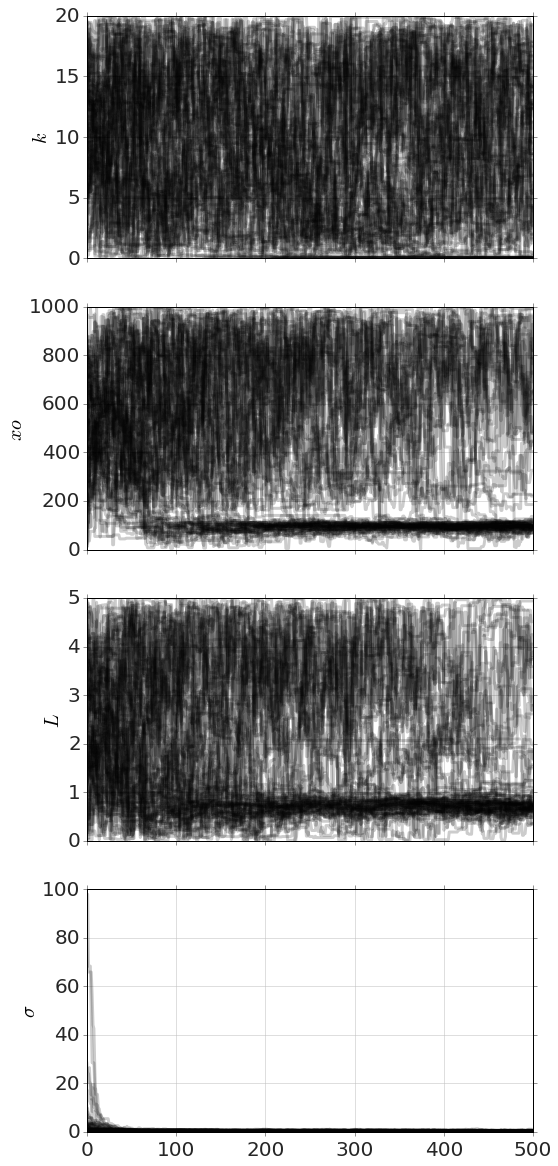

In [29]:
model=MCMCModel(x,y,logistic,
                L=Uniform(0,5),
                k=Uniform(0,20),
                xo=Uniform(0,1000),
                )
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
1.38 s


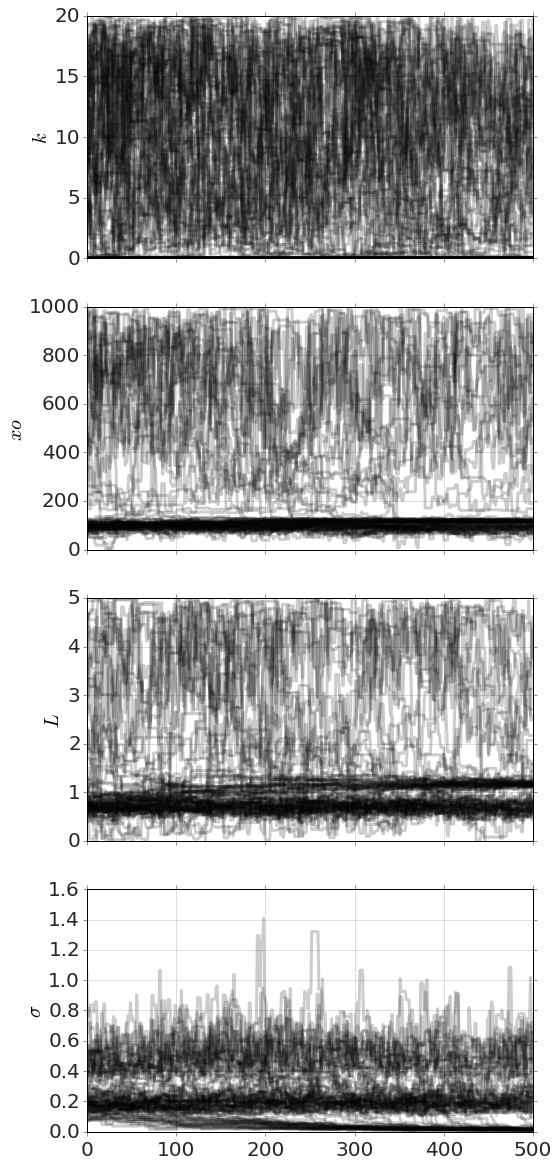

In [30]:
model.run_mcmc(500)
model.plot_chains()

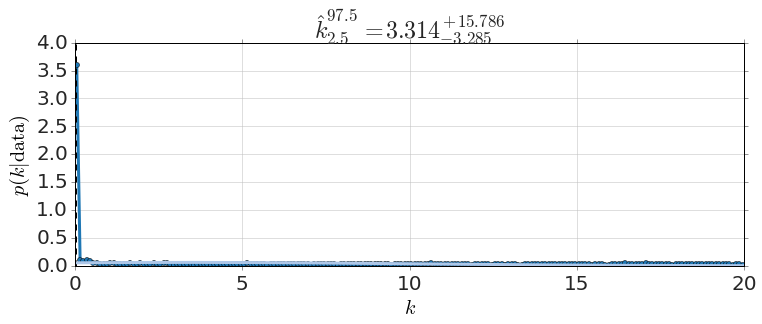

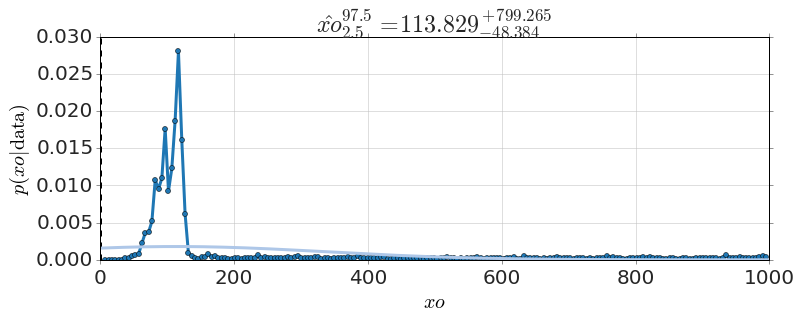

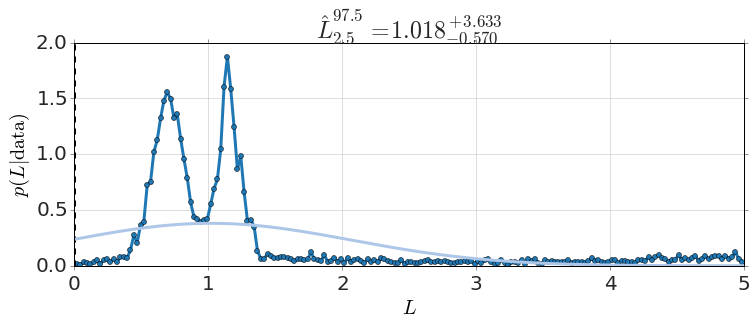

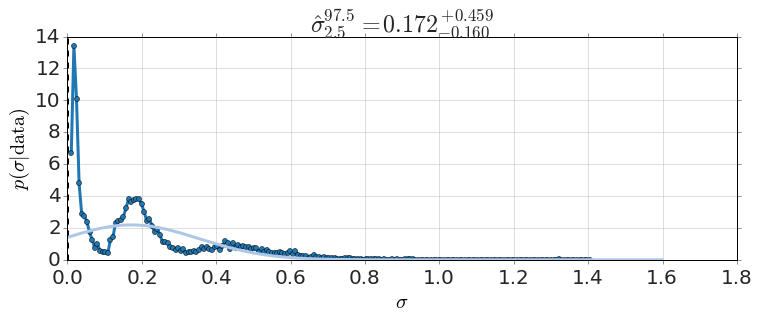

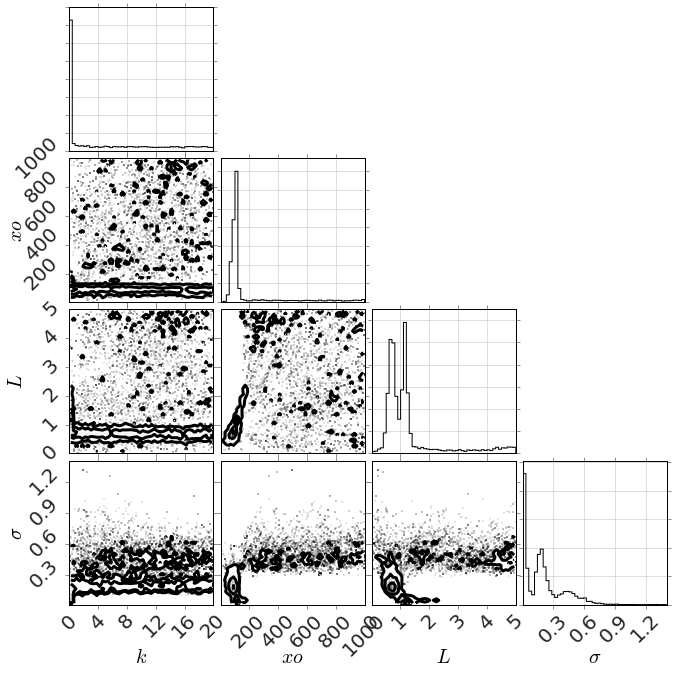

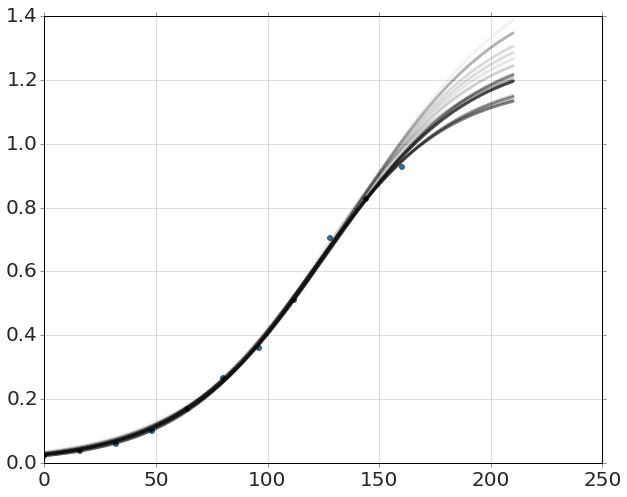

In [31]:
model.plot_distributions()
model.triangle_plot()

figure()
plot(x,y,'o')

xfit=linspace(min(x),max(x)+50,200)
model.plot_predictions(xfit,100)    